Enter the radius for frequency mask (e.g., 100-146 gives the clearest images): 15


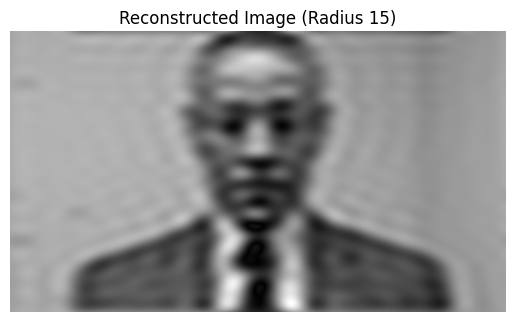

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to grayscale
image_path = '/content/gus.png'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Perform the 2D Fourier Transform
f_transform = np.fft.fft2(img_array)

# Shift the zero-frequency component to the center
f_shift = np.fft.fftshift(f_transform)

# Get the shape of the image
rows, cols = img_array.shape
crow, ccol = rows // 2, cols // 2

# Get input for the radius from the user
radius = int(input("Enter the radius for frequency mask (e.g., 100-146 gives the clearest images): "))

# Set a fixed Fourier multiplier value
fourier_multiplier = 1.5

# Apply the Fourier value multiplier (scaling the Fourier components) before masking
f_shift_scaled = f_shift * fourier_multiplier

# Create a mask with the specified radius
mask = np.zeros((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1

# Apply the mask to keep only part of the frequencies
f_shift_masked = f_shift_scaled * mask

# Perform inverse FFT to reconstruct the image
f_ishift = np.fft.ifftshift(f_shift_masked)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the reconstructed image
plt.imshow(img_back, cmap='gray')
plt.title(f"Reconstructed Image (Radius {radius})")
plt.axis('off')
plt.show()
